In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os
import base64
import struct
from multiprocessing import Pool

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
 

RuntimeError: No ffmpeg exe could be found. Install ffmpeg on your system, or set the IMAGEIO_FFMPEG_EXE environment variable.

In [3]:
#ForDavid
DataPath = "./RawData/**/*.csv"
FilteredDataPath = "./GeneratedData/"
AnimPath = "./GeneratedVideos/"
FilteredDataPathPlayback = "./GeneratedData/playback/"


In [4]:
def decode_position(encoded_position):
    # Decode the Base64 string to bytes
    bytes_array = base64.b64decode(encoded_position)

    # Unpack the byte array to floats; 'f' denotes a 32-bit float, and '<' denotes little-endian byte order
    x, y, z = struct.unpack('<fff', bytes_array)

    return np.array([x, y, z])

In [16]:
def CreateAnimation(in_df, filename):
  fig, ax = plt.subplots()
  StartTime = in_df["ScenarioTime"].min()
  StopTime = in_df["ScenarioTime"].max()
  colums = [x for x in in_df if "Pos" in x]
  scat = {}
  xmin =5000
  ymin=5000
  xmax=-5000
  ymax=-5000
  padding =2
  for col in colums:
    scat[col] = ax.scatter(in_df[col].iloc[0][0], in_df[col].iloc[0][2],s=0.25)
    if (in_df[col].apply(lambda pos: pos[0]).min()<xmin):
      xmin = in_df[col].apply(lambda pos: pos[0]).min()
    if (in_df[col].apply(lambda pos: pos[0]).max()>xmax):
      xmax = in_df[col].apply(lambda pos: pos[0]).max()
    if (in_df[col].apply(lambda pos: pos[2]).min()<ymin):
      ymin = in_df[col].apply(lambda pos: pos[2]).min()
    if (in_df[col].apply(lambda pos: pos[2]).max()>ymax):
      ymax = in_df[col].apply(lambda pos: pos[2]).max()
    
    

  ax.set(xlim=[xmin-padding, xmax+padding], ylim=[ymin-padding, ymax+padding], xlabel='x', ylabel='z')
  ax.legend()



  def update(t):
    #print(t)
    index_of_nearest = (np.abs(in_df['ScenarioTime'] - t)).argmin()
    for col in colums:
      data = np.stack([in_df[col].iloc[index_of_nearest][0],in_df[col].iloc[index_of_nearest][2]]).T
      scat[col].set_offsets(data)
    return mplfig_to_npimage(fig)

  ani = VideoClip(update,duration=StopTime )
  ani.write_videofile(os.path.join(AnimPath,filename+".mp4"),fps=24)
  #ani.ipython_display(fps = 18, loop = True, autoplay = True)
  #ani = animation.FuncAnimation(fig=fig, func=update, frames=in_df.shape[0], interval=18)
  #ani.save(filename=os.path.join(AnimPath,filename+".mp4"), writer="ffmpeg")
  
  

In [17]:
def process_csv_file(val):
    Scenario = os.path.basename(val).split('-')[1].split('_')[0]
    run = os.path.basename(val).split('-')[2].split('_')[0]
    try:
        df = pd.read_csv(val, sep=';')
    except Exception as e:
        print(f"An error occurred while reading {Scenario} at {run}: {e}")
        return  # Exit the function on error
    df_out = pd.DataFrame()
    columns = [x for x in df if "Pos" in x]
    for col in columns:
       # print(col)
        expanded_cols = df[col].apply(lambda x: decode_position(x))
        df_out = pd.concat([df_out, expanded_cols], axis=1)
    df_out = pd.concat([df_out, df["ScenarioTime"]], axis=1)
    #print("Making The Video for:", Scenario, run)
    CreateAnimation(df_out, Scenario + "-" + run)

In [18]:
pd.options.mode.chained_assignment = None
CSVFiles = glob.glob(DataPath, recursive=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [17:20<197:23:41, 1040.44s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-101.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-101.mp4



t:   0%|          | 1/684 [24:24<277:52:55, 1464.68s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-101.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [24:26<278:12:57, 1466.44s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-102.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-102.mp4



t:   0%|          | 1/684 [30:36<348:28:55, 1836.80s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-102.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [30:38<348:51:52, 1838.82s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-103.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-103.mp4



t:   0%|          | 1/684 [40:14<458:09:54, 2414.93s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-103.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [40:17<458:35:49, 2417.20s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-104.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-104.mp4



t:   0%|          | 1/684 [51:02<580:58:37, 3062.25s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-104.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [51:04<581:24:42, 3064.54s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-105.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-105.mp4



t:   0%|          | 1/684 [1:02:03<706:21:47, 3723.14s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-105.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:02:06<706:58:02, 3726.33s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-106.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-106.mp4



t:   0%|          | 1/684 [1:10:37<803:57:23, 4237.55s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-106.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:10:38<804:07:14, 4238.41s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-12.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-12.mp4



t:   0%|          | 1/684 [1:13:07<832:22:32, 4387.34s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-12.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:13:08<832:32:36, 4388.22s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-15.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-15.mp4



t:   0%|          | 1/684 [1:16:24<869:51:55, 4584.94s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-15.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:16:25<870:01:40, 4585.80s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-16.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-16.mp4



t:   0%|          | 1/684 [1:18:52<897:51:01, 4732.45s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-16.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:18:53<898:01:21, 4733.36s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-21.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-21.mp4



t:   0%|          | 1/684 [1:22:43<941:44:54, 4963.83s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-21.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:22:44<941:54:38, 4964.68s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-3.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-3.mp4



t:   0%|          | 1/684 [1:25:42<975:44:01, 5142.96s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-3.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:25:43<975:55:30, 5143.97s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Ped-7.mp4.
Moviepy - Writing video ./GeneratedVideos/Ped-7.mp4



t:   0%|          | 1/684 [1:28:49<1011:04:13, 5329.21s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Ped-7.mp4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
t:   0%|          | 1/684 [1:28:49<1011:10:30, 5329.77s/it, now=None]

Moviepy - Building video ./GeneratedVideos/Practice-temp.mp4.
Moviepy - Writing video ./GeneratedVideos/Practice-temp.mp4



t:   0%|          | 1/684 [1:29:04<1014:03:39, 5344.98s/it, now=None]

Moviepy - Done !
Moviepy - video ready ./GeneratedVideos/Practice-temp.mp4


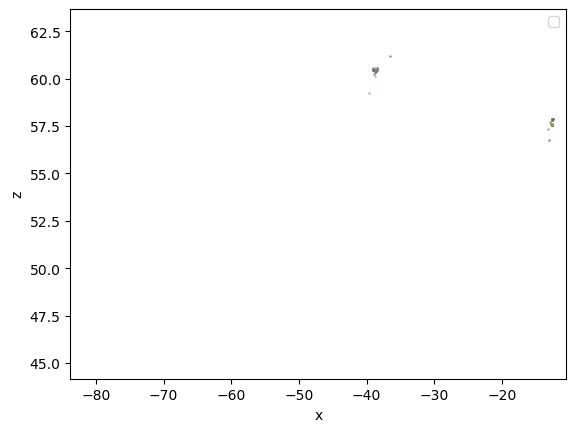

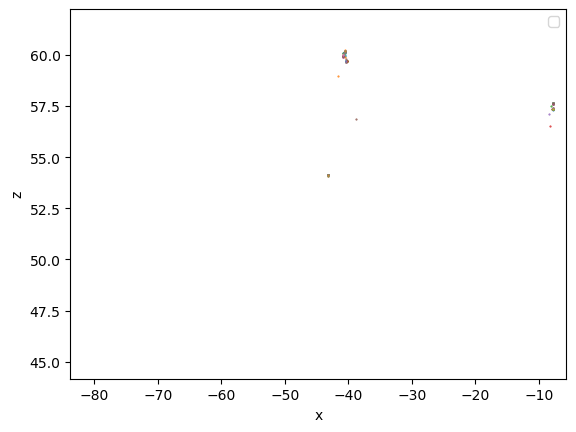

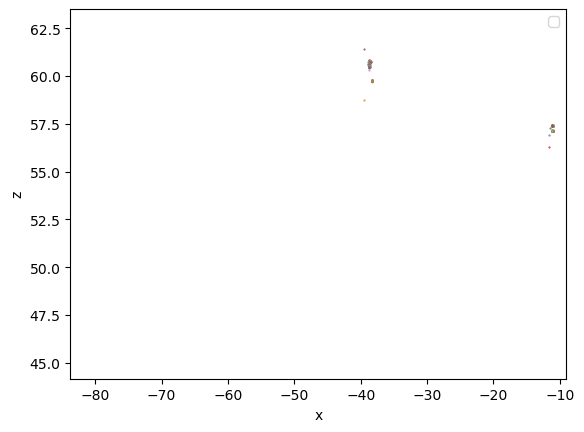

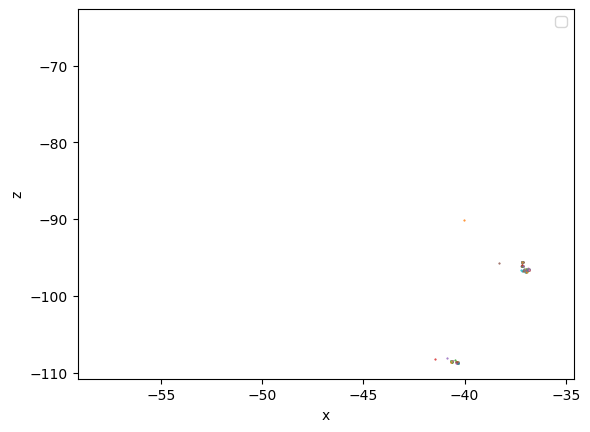

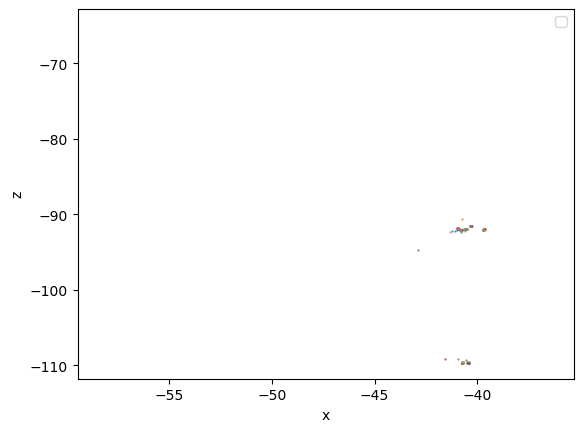

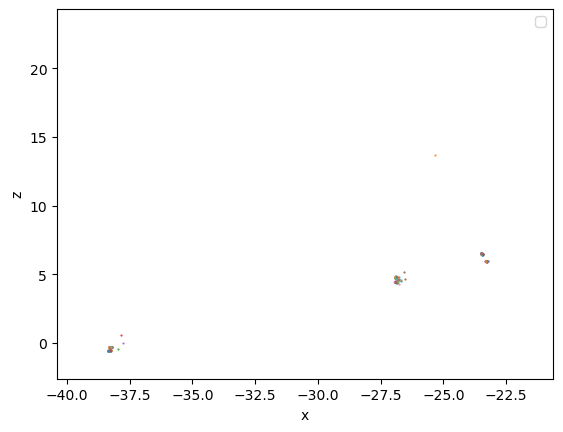

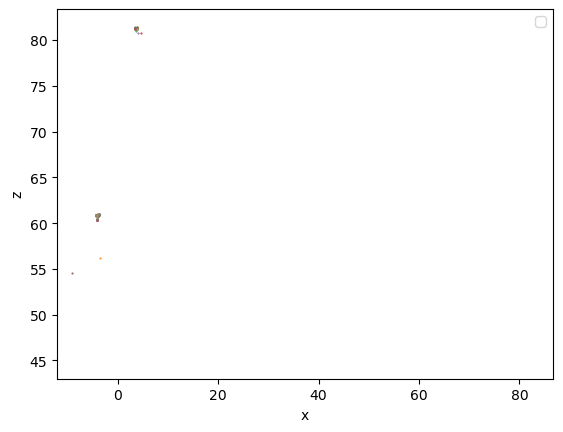

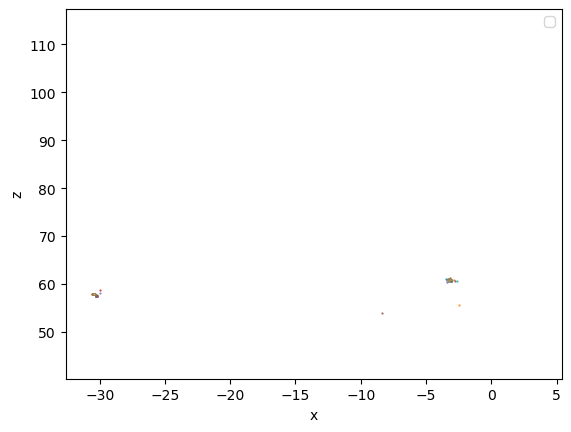

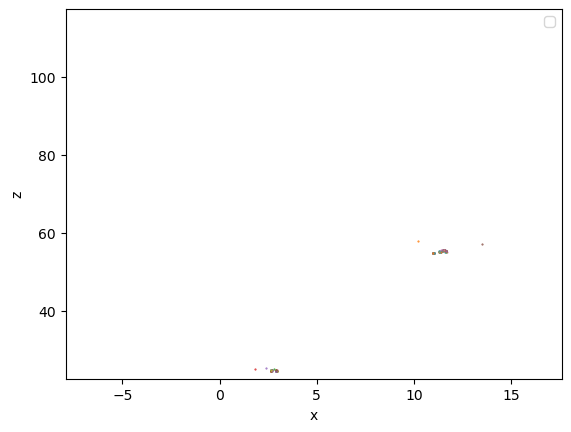

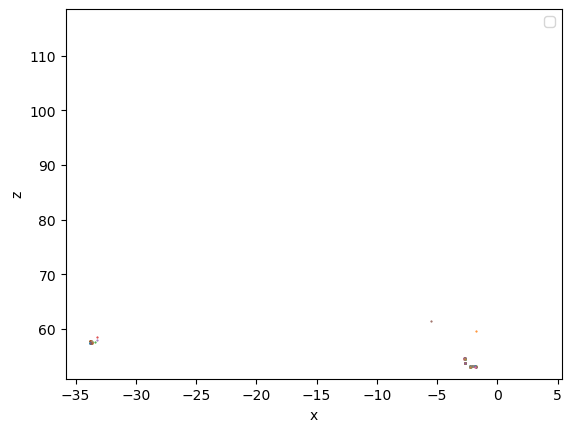

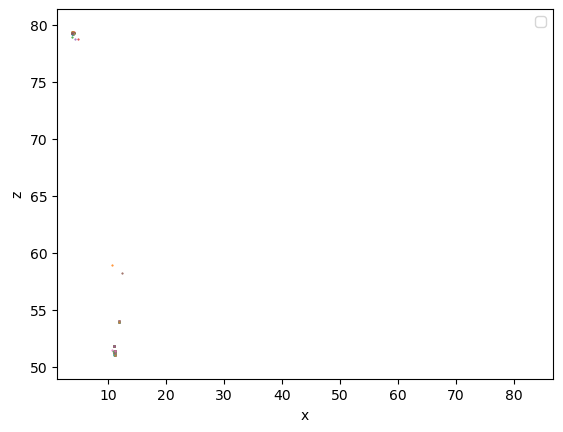

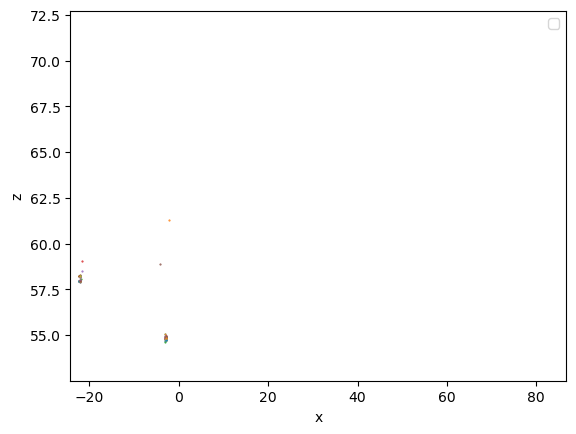

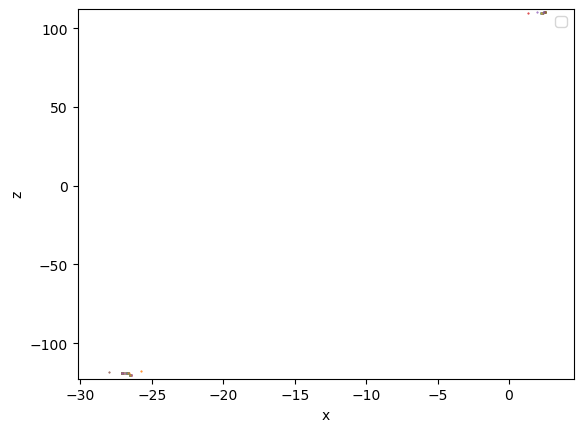

In [20]:
for file in CSVFiles:
    process_csv_file(file)

In [60]:

    
    # Adjust the max_workers parameter as needed based on your system's capabilities
with Pool(12) as p:
  print(p.map(process_csv_file,CSVFiles))






In [53]:
print("test")

test


In [54]:
CSVFiles

['./RawData\\Pilot2\\csv\\CSV_Scenario-Ped-101_Session-temp_2024-02-14-11-21-21.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-102_Session-temp_2024-02-14-11-10-25.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-103_Session-temp_2024-02-14-11-28-53.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-104_Session-temp_2024-02-14-11-32-04.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-105_Session-temp_2024-02-14-11-42-44.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-106_Session-temp_2024-02-14-11-33-31.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-12_Session-temp_2024-02-14-11-40-15.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-15_Session-temp_2024-02-14-11-37-13.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-16_Session-temp_2024-02-14-11-14-18.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-21_Session-temp_2024-02-14-11-05-22.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-3_Session-temp_2024-02-14-11-18-15.csv',
 './RawData\\Pilot2\\csv\\CSV_Scenario-Ped-7_Session-temp_20